# GASMAS

Date: 16/01/2025

Recolected data: 13/01/2025
on internet: https://colab.research.google.com/drive/1djV26jvRAwaaeW0MAl4zbxs0Z91--mve#scrollTo=nOliIFy9mtqH

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### First attempt: 

Check the initial conditions.


#### Let's check the different signals for each case:

For this part of the experiment is changing the number of foams.


In [3]:
# Function to transform the csv to dataframe object
def csv_to_df(file_path):
    """
    This function reads a CSV file and processes it by renaming the columns.
    
    Parameters:
    - file_path: str, path to the CSV file
    
    Returns:
    - DataFrame: a processed pandas DataFrame with renamed columns
    """
    df =  pd.read_csv(file_path, header = 1)
    #Rename the columns at the first row
    df=df.rename({"second":"x", "Volt":"Direct", "Volt.1":"WMS signal" }, axis=1) #Wavelength-Modulation Spectroscopy
    return df

def creation_df_list(file_path):
    """
    This function processes a list of file paths and returns a list of DataFrames.
    
    Parameters:
    - file_paths: list of str, paths to the CSV files
    
    Returns:
    - list of DataFrame: list of DataFrames created from the CSV files
    """
    dfs=[]

    for file in file_path:
    
        df = csv_to_df(file)
        
        dfs.append(df)
    return dfs
def check_signal_down(list_of_dfs, num_measurements):
    nrows = len(list_of_dfs)
    # Plotting the signals for each DataFrame in the list
    plt.figure(figsize=(15, 18))  # Create a larger figure for better visualization

    # Plot for each DataFrame in the list
    for i, df in enumerate(list_of_dfs):
        # Plot the 'WMS signal' in the first column (first subplot)
        plt.subplot(nrows, 2, 2*i + 1)  # 2*i + 1 places the plot in the 1st column
        plt.plot(df.x, df['WMS signal'], label="WMS signal")  # Plot the 'WMS signal'
        plt.legend()  # Show the legend
        plt.title(f"Measurement {i + 1}, # foam = {num_measurements-i}")  # Title each plot with the measurement number
        plt.xlabel('Time (s)')
        plt.ylabel('Signal (Volt)')
        
        # Plot the 'Direct signal' in the second column (second subplot)
        plt.subplot(nrows, 2, 2*i + 2)  # 2*i + 2 places the plot in the 2nd column
        plt.plot(df.x, -df.Direct, label="Direct signal")  # Plot the 'Direct' signal (negative)
        plt.legend()  # Show the legend
        plt.title(f"Measurement {i + 1}, # foam = {num_measurements-i}")  # Title each plot with the measurement number
        plt.xlabel('Time (s)')
        plt.ylabel('Signal (Volt)')

    # Adjust layout to prevent overlap between subplots
    plt.tight_layout()
    plt.show()
    
def check_signal_up(list_of_dfs, begin_measure):
    nrows = len(list_of_dfs)
    # Plotting the signals for each DataFrame in the list
    plt.figure(figsize=(15, 18))  # Create a larger figure for better visualization

    # Plot for each DataFrame in the list
    for i, df in enumerate(list_of_dfs):
        # Plot the 'WMS signal' in the first column (first subplot)
        plt.subplot(nrows, 2, 2*i + 1)  # 2*i + 1 places the plot in the 1st column
        plt.plot(df.x, df['WMS signal'], label="WMS signal")  # Plot the 'WMS signal'
        plt.legend()  # Show the legend
        plt.title(f"Measurement {i + 1}, # foam = {begin_measure+i}")  # Title each plot with the measurement number
        plt.xlabel('Time (s)')
        plt.ylabel('Signal (Volt)')
        
        # Plot the 'Direct signal' in the second column (second subplot)
        plt.subplot(nrows, 2, 2*i + 2)  # 2*i + 2 places the plot in the 2nd column
        plt.plot(df.x, -df.Direct, label="Direct signal")  # Plot the 'Direct' signal (negative)
        plt.legend()  # Show the legend
        plt.title(f"Measurement {i + 1}, # foam = {begin_measure+i}")  # Title each plot with the measurement number
        plt.xlabel('Time (s)')
        plt.ylabel('Signal (Volt)')

    # Adjust layout to prevent overlap between subplots
    plt.tight_layout()
    plt.show()

def signals(list_of_dfs):
    gasmas=[]
    s2fCheckPoint=[]
    sDirCheckPoint=[]
    for i, df in enumerate(list_of_dfs):
        #Define max and min:
        df=df.dropna(subset='WMS signal').reset_index(drop=True)

        #Definir el máx:
        WMSmax=df['WMS signal'].max()


        #Dataframe, get the x value for the maximum in WMS:
        dfmaxs=df[(df['WMS signal']==WMSmax)]
        newx=dfmaxs['x'].values

        #Define the range for each minimum
        df_Filt1= df[(df['x']<=newx[0])]
        df_Filt2= df[(df['x']>=newx[0])]

        #Get both minimums
        minimo11, minimo12 = df_Filt1['WMS signal'].min(), df_Filt2['WMS signal'].min()
        #Define sDir which is the value in the direct signal to normalize gasmas signal
        sDir=-dfmaxs['Direct'].values
        sDir[0]
        sDirCheckPoint.append(sDir[0])
        #Mean between maximum and minimum
        s2f=np.abs((WMSmax-minimo11))+np.abs(WMSmax-minimo12)/2
        s2fCheckPoint.append(s2f)
        #GASMAS signal normalized
        sAbs=s2f/sDir[0]
        #Creation of an array to save Gasmas normalized
        gasmas.append(sAbs)
    return gasmas, s2fCheckPoint, sDirCheckPoint

In [26]:
#Get paths for each measurement. This is going to be used just to check that the signal is correct.
exp_jtc = "GASMAS_13_01_25/just_to_check/more_data/progressive_comparison/" 
#Collect all the files in the folder with the measurements
# Collect all CSV files
all_files_in_exp_jtc = sorted(glob.glob(exp_jtc+ '*.csv'))
# print(all_files_in_exp_jtc)
# Process all the files into a list of DataFrames
# Extract even position values
avg_8 = all_files_in_exp_jtc[1::2]
avg_16 = all_files_in_exp_jtc[::2]
# print(avg_8)
list_of_dfs_exp_jtc = creation_df_list(all_files_in_exp_jtc)
list_of_dfs_avg_8 =creation_df_list(avg_8)
list_of_dfs_avg_16 = creation_df_list(avg_16)

24_01_25
About the equipment:

Gen. Func 4.33Hz | 01.0 vpp | 00.1DC

Gen. Func. Modulation: Freq: 10kHz |vhiz=+250 mVpp| 50 ohm| DC=0.00mv(0.00mv)| Sym=50.0% (50.0%)

Temp set = 18.49 Celsius  |    ILD= to the max

Lock in: Time const: 1*1ms | 16db | Activate-sync
            Signal input: Input: A |Couple: AC| Ground: Float
            Reserve: Low Noise
            Filters: Line
            Sensitivity: 2x100 mV 
            
Volt: -333


Note: the sensitivity of Lock in were changed for different samples

In [27]:
print(avg_8)

['GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_10.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_12.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_14.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_16.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_18.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_20.csv']


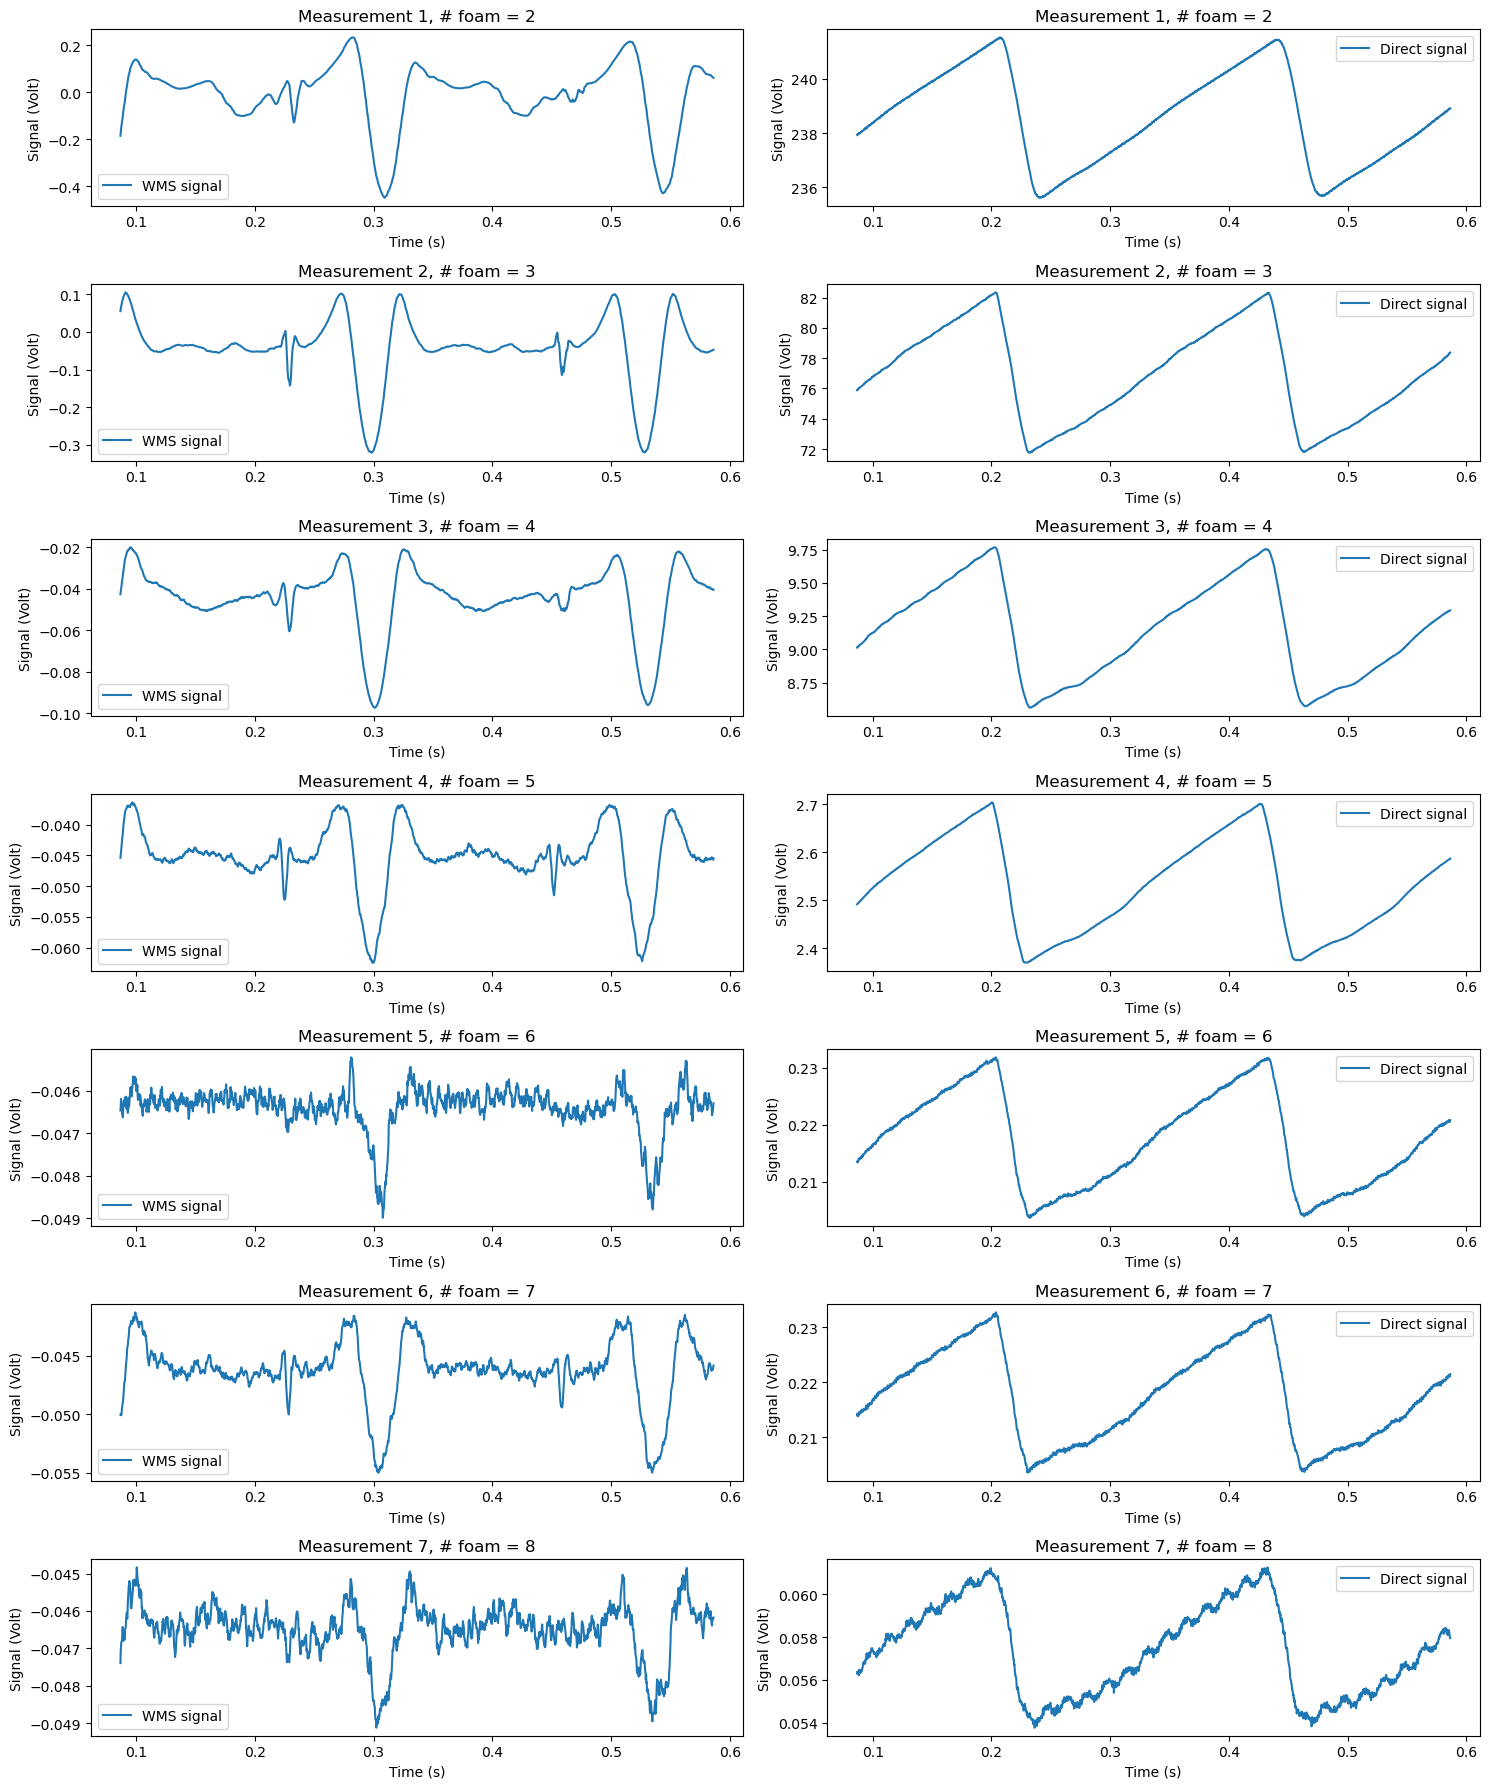

In [28]:
check_signal_up(list_of_dfs_avg_16,2)

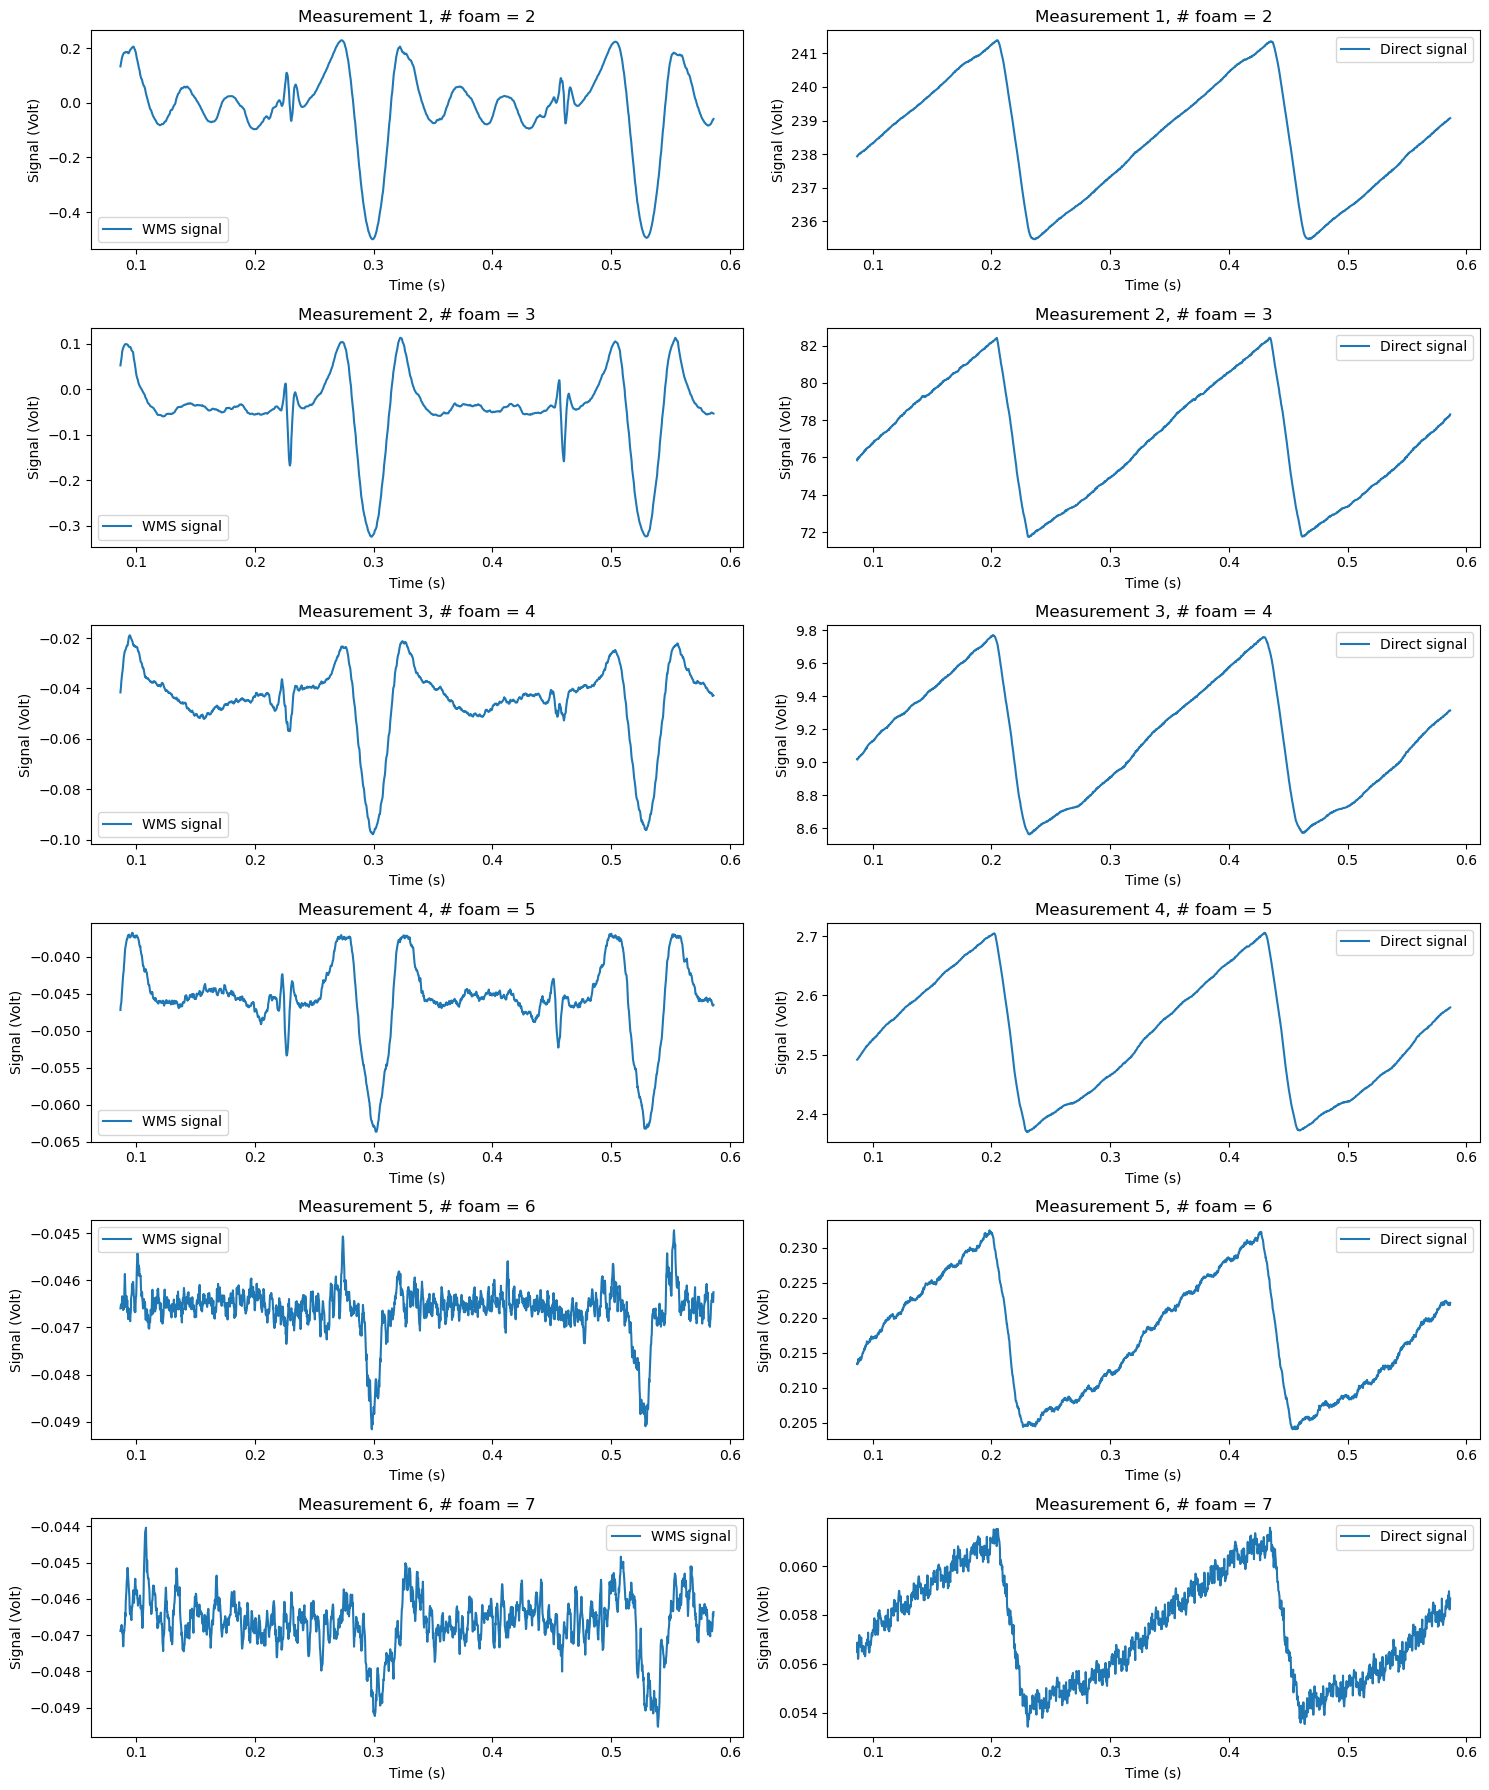

In [29]:
check_signal_up(list_of_dfs_avg_8,2)

In [32]:
#Datos columna de aire/Num of foams
num_foam=np.arange(2,8,1)
# colAire=np.append(colAire, 2.9)

print(num_foam)

[2 3 4 5 6 7]


In [33]:
gasmas_avg_8, s2fCheckPoint_avg_8, sDirCheckPoint_avg_8=signals(list_of_dfs_avg_8)

[np.float64(0.68922735), np.float64(0.6545725), np.float64(0.062181), np.float64(0.023911949999999994), np.float64(0.005239550000000006), np.float64(0.006009450000000003)]
[np.float64(236.4938725), np.float64(76.2817273), np.float64(9.0832373), np.float64(2.5190298), np.float64(0.2167194), np.float64(0.0575402)]


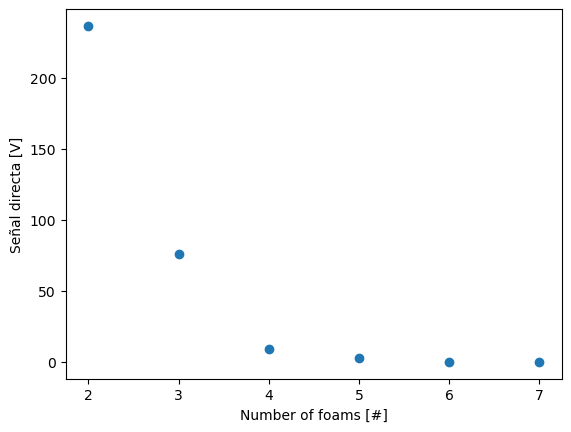

In [34]:
print(s2fCheckPoint_avg_8)
print(sDirCheckPoint_avg_8)

#plt.scatter(colAire,s2fCheckPoint)
plt.scatter(num_foam,sDirCheckPoint_avg_8)
plt.xlabel("Number of foams [#]")
plt.ylabel("Señal directa [V]")
#plt.ylabel("Señal de Absorcion 2f [V]")
plt.show()

In [36]:
params_1=np.polyfit(num_foam,gasmas_avg_8,1)
vec_1=np.linspace(0,7,100)
y_1=params_1[0]*vec_1+params_1[1] #y=mx+b

b -0.045546828732660374
m: 0.01591593842956944
The equivalent mean path lengths: -2.8617117950168214


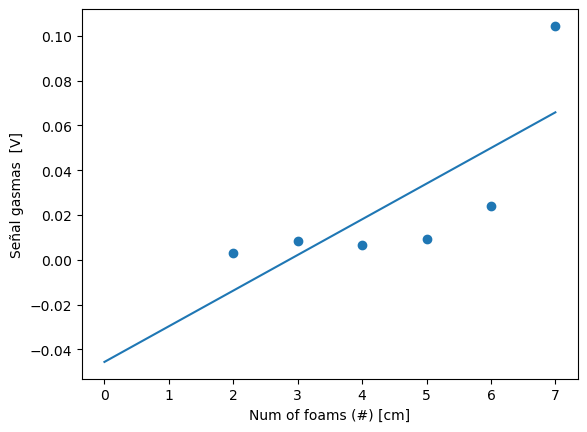

In [37]:
plt.plot(vec_1,y_1,label="lineal")
plt.scatter(num_foam,gasmas_avg_8)
print("b", params_1[1])
print("m:", params_1[0])
EMPL=params_1[1]/params_1[0]
print("The equivalent mean path lengths:", EMPL)
plt.xlabel("Num of foams (#) [cm]")
plt.ylabel("Señal gasmas  [V]")
plt.show()

### Experiment 2:

In [48]:
print(avg_16)

['GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_09.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_11.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_13.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_15.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_17.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_19.csv', 'GASMAS_13_01_25/just_to_check/more_data/progressive_comparison\\scope_21.csv']


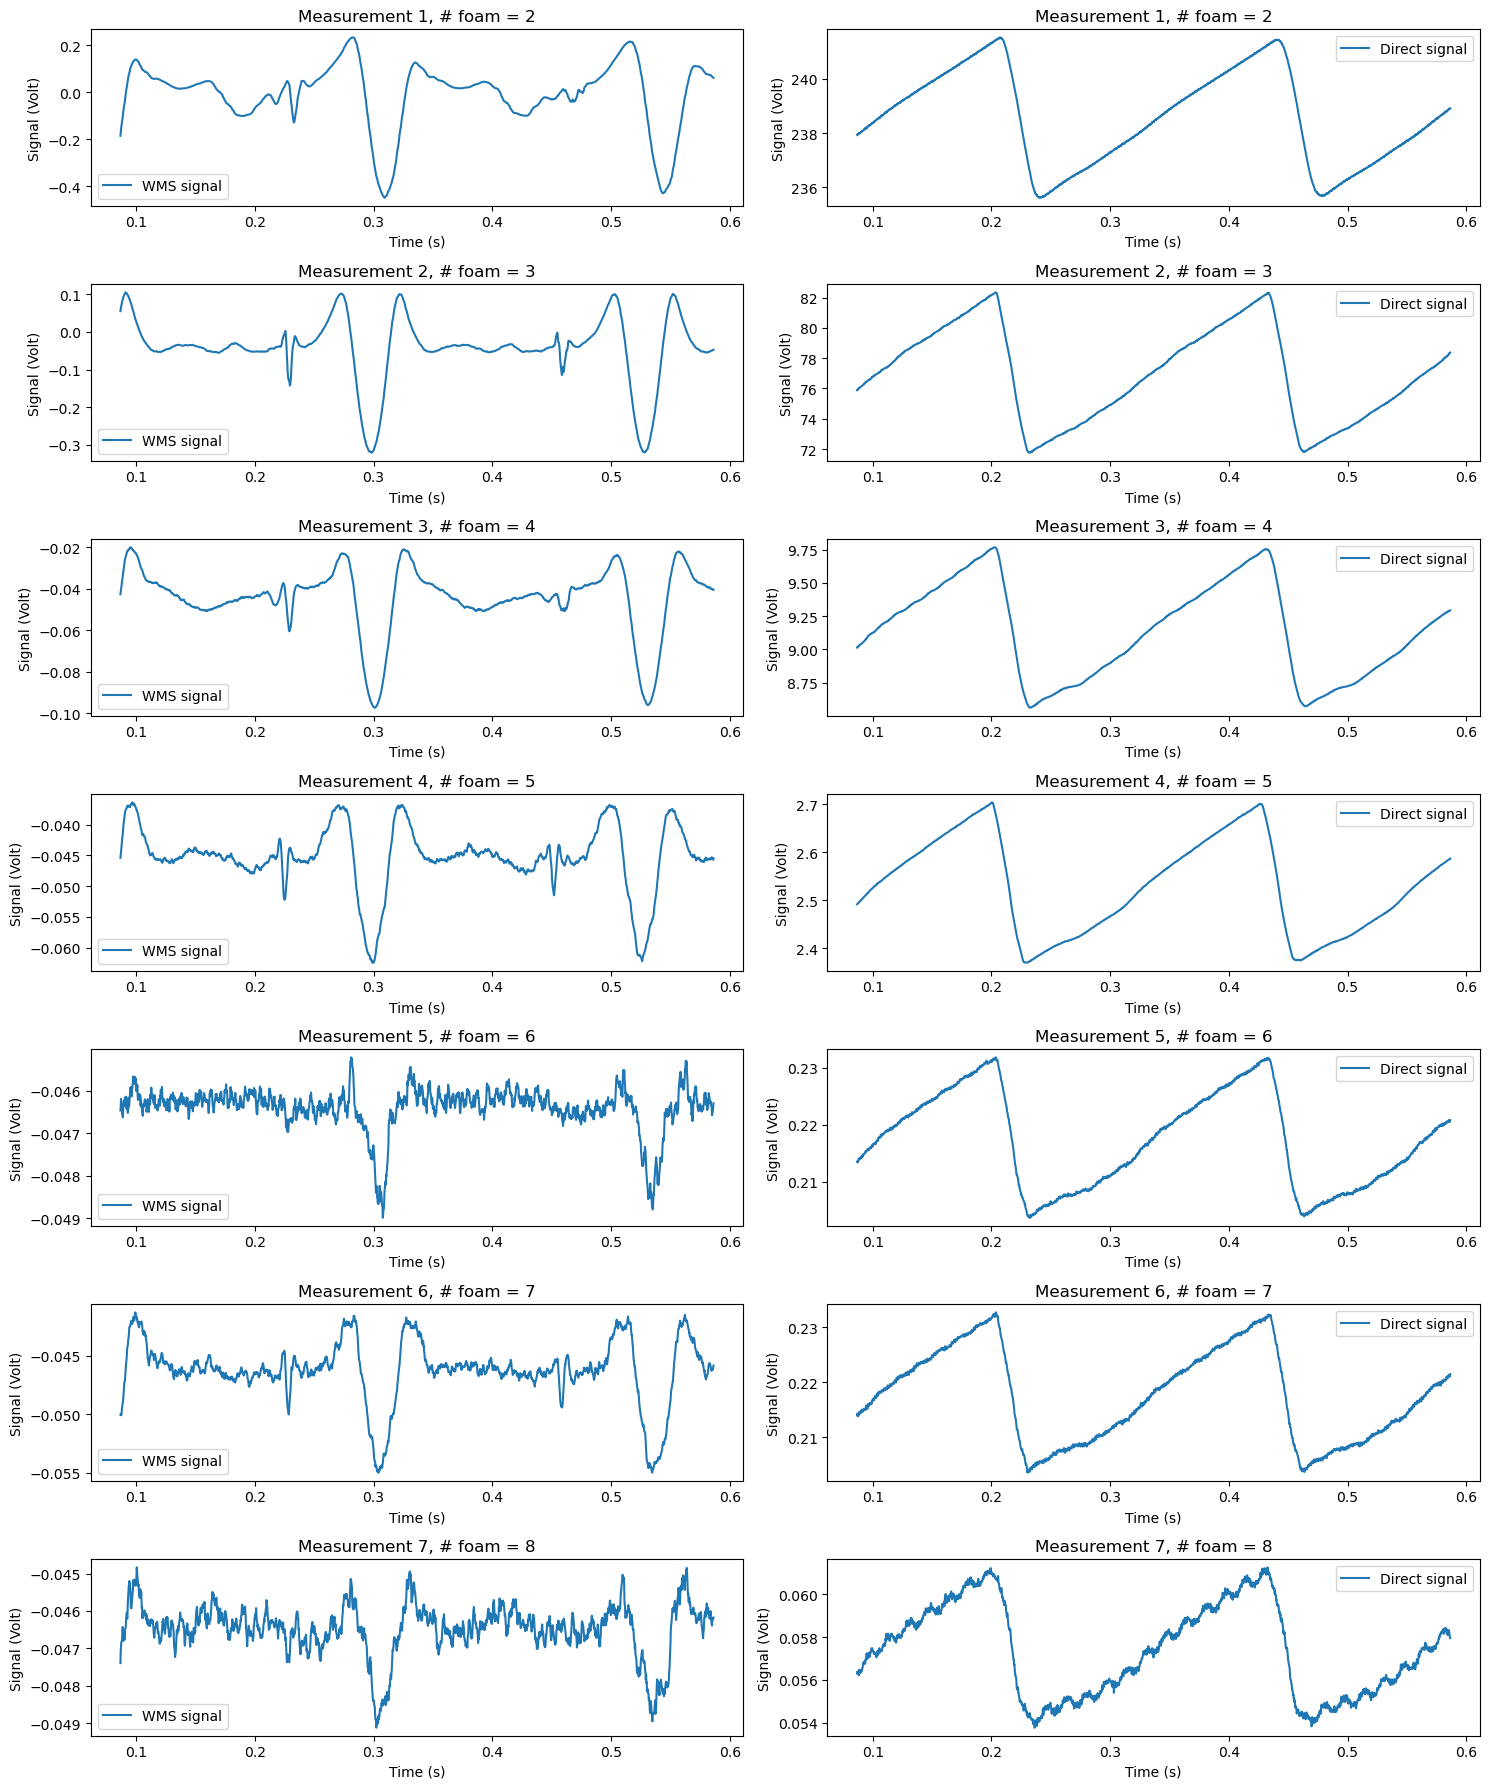

In [ ]:
check_signal_up(list_of_dfs_avg_16,2)


In [43]:
#Datos columna de aire/Num of foams
foams_num=np.arange(2,9,1)
# colAire=np.append(colAire, 2.9)

print(foams_num)

[2 3 4 5 6 7 8]


In [44]:
gasmas_2, s2fCheckPoint_2, sDirCheckPoint_2=signals(list_of_dfs_avg_16)

[np.float64(0.75882665), np.float64(0.2624535), np.float64(0.061179750000000005), np.float64(0.02209705), np.float64(0.0036276999999999976), np.float64(0.015604200000000002), np.float64(0.004705450000000007)]
[np.float64(236.7402858), np.float64(76.1870665), np.float64(9.0853252), np.float64(2.5182298), np.float64(0.2085347), np.float64(0.2163868), np.float64(0.0573029)]


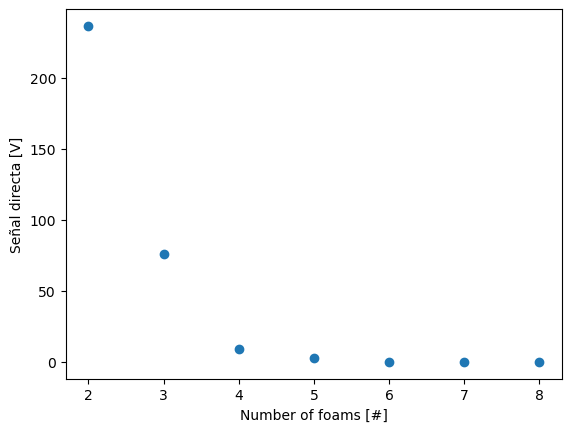

In [45]:
print(s2fCheckPoint_2)
print(sDirCheckPoint_2)

#plt.scatter(colAire,s2fCheckPoint)
plt.scatter(foams_num,sDirCheckPoint_2)
plt.xlabel("Number of foams [#]")
plt.ylabel("Señal directa [V]")
#plt.ylabel("Señal de Absorcion 2f [V]")
plt.show()

In [46]:
params_2=np.polyfit(foams_num,gasmas_2,1)
vec_2=np.linspace(0,8,100)
y_2=params_2[0]*vec_2+params_2[1] #y=mx+b

b -0.04101811367950892
m: 0.013740279308993889
The equivalent mean path lengths: -2.98524598787886


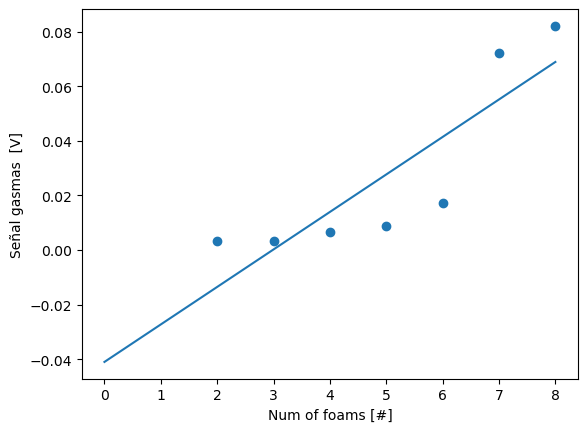

In [47]:
plt.plot(vec_2,y_2,label="lineal")
plt.scatter(foams_num,gasmas_2)
print("b", params_2[1])
print("m:", params_2[0])
EMPL=params_2[1]/params_2[0]
print("The equivalent mean path lengths:", EMPL)
plt.xlabel("Num of foams [#]")
plt.ylabel("Señal gasmas  [V]")
plt.show()

### Experiment 3:

### Comparative

The EMPL: -2.98524598787886


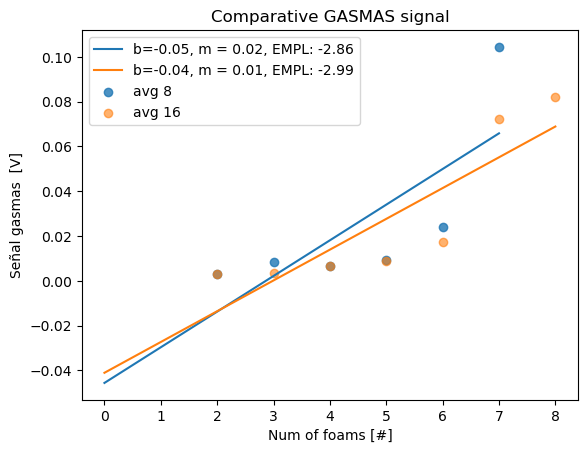

In [49]:
plt.plot(vec_1, y_1, label=f"b={params_1[1]:.2f}, m = {params_1[0]:.2f}, EMPL: {params_1[1]/params_1[0]:.2f}")
plt.plot(vec_2, y_2, label=f"b={params_2[1]:.2f}, m = {params_2[0]:.2f}, EMPL: {params_2[1]/params_2[0]:.2f}")
# plt.plot(vec_3, y_3, label=f"b={params_3[1]:.2f}, m = {params_3[0]:.2f}, EMPL: {params_3[1]/params_3[0]:.2f}")
plt.scatter(num_foam,gasmas_avg_8, label = "avg 8", alpha=0.8)
plt.scatter(foams_num,gasmas_2, label= "avg 16", alpha=0.6)

# plt.scatter(foams_num_3,gasmas_3, label = "exp 3", alpha=0.3)
# print("b", params[1])
# print("m:", params[0])
# EMPL=params[1]/params[0]
print("The EMPL:", EMPL)
plt.xlabel("Num of foams [#]")
plt.ylabel("Señal gasmas  [V]")
plt.title("Comparative GASMAS signal")
plt.legend()
plt.show()

The equivalent mean path lengths for exp 1, exp 2, and exp 3 are: -1.72, -3.31, and -3.16 respectively.


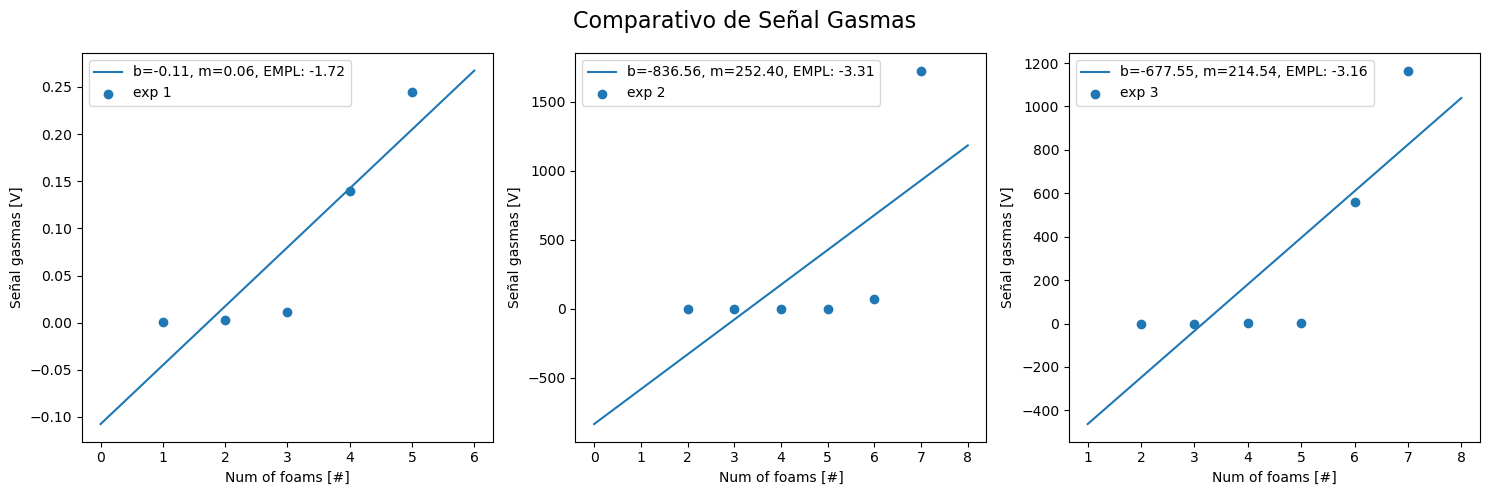

In [150]:
import matplotlib.pyplot as plt

# Calcular EMPL para cada conjunto de parámetros
EMPL_1 = params_1[1] / params_1[0]
EMPL_2 = params_2[1] / params_2[0]
EMPL_3 = params_3[1] / params_3[0]

# Crear una figura con 1 fila y 3 columnas para las subgráficas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primer subplot
axes[0].plot(vec_1, y_1, label=f"b={params_1[1]:.2f}, m={params_1[0]:.2f}, EMPL: {EMPL_1:.2f}")
axes[0].scatter(colAire, gasmas, label="exp 1")
axes[0].set_xlabel("Num of foams [#]")
axes[0].set_ylabel("Señal gasmas [V]")
axes[0].legend()

# Segundo subplot
axes[1].plot(vec_2, y_2, label=f"b={params_2[1]:.2f}, m={params_2[0]:.2f}, EMPL: {EMPL_2:.2f}")
axes[1].scatter(foams_num, gasmas_2, label="exp 2")
axes[1].set_xlabel("Num of foams [#]")
axes[1].set_ylabel("Señal gasmas [V]")
axes[1].legend()

# Tercer subplot
axes[2].plot(vec_3, y_3, label=f"b={params_3[1]:.2f}, m={params_3[0]:.2f}, EMPL: {EMPL_3:.2f}")
axes[2].scatter(foams_num_3, gasmas_3, label="exp 3")
axes[2].set_xlabel("Num of foams [#]")
axes[2].set_ylabel("Señal gasmas [V]")
axes[2].legend()

# Imprimir el valor de EMPL
print(f"The equivalent mean path lengths for exp 1, exp 2, and exp 3 are: {EMPL_1:.2f}, {EMPL_2:.2f}, and {EMPL_3:.2f} respectively.")

# Título general para la figura
plt.suptitle("Comparativo de Señal Gasmas", fontsize=16)

# Ajustar el espaciado entre subgráficas
plt.tight_layout()

# Mostrar l


The equivalent mean path lengths for exp 1, exp 2, and exp 3 are: -1.72, -3.31, and -3.16 respectively.


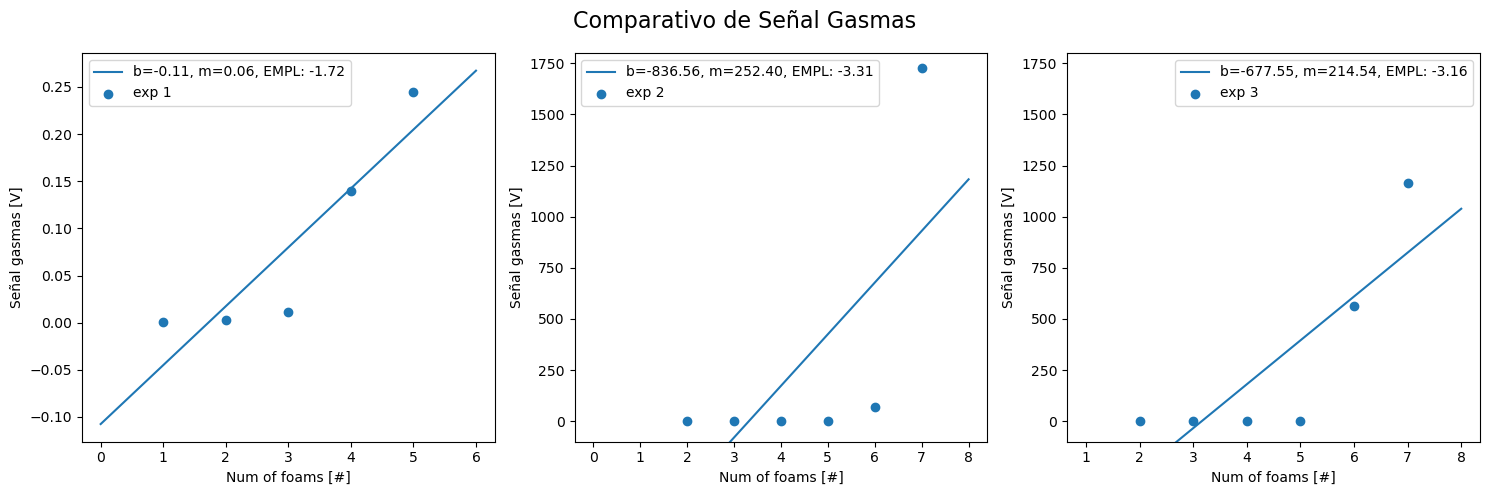

In [152]:
import matplotlib.pyplot as plt

# Calcular EMPL para cada conjunto de parámetros
EMPL_1 = params_1[1] / params_1[0]
EMPL_2 = params_2[1] / params_2[0]
EMPL_3 = params_3[1] / params_3[0]

# Crear una figura con 1 fila y 3 columnas para las subgráficas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primer subplot
axes[0].plot(vec_1, y_1, label=f"b={params_1[1]:.2f}, m={params_1[0]:.2f}, EMPL: {EMPL_1:.2f}")
axes[0].scatter(colAire, gasmas, label="exp 1")
axes[0].set_xlabel("Num of foams [#]")
axes[0].set_ylabel("Señal gasmas [V]")
axes[0].legend()

# Segundo subplot
axes[1].plot(vec_2, y_2, label=f"b={params_2[1]:.2f}, m={params_2[0]:.2f}, EMPL: {EMPL_2:.2f}")
axes[1].scatter(foams_num, gasmas_2, label="exp 2")
axes[1].set_xlabel("Num of foams [#]")
axes[1].set_ylabel("Señal gasmas [V]")
axes[1].set_ylim(-100,1800)
axes[1].legend()

# Tercer subplot
axes[2].plot(vec_3, y_3, label=f"b={params_3[1]:.2f}, m={params_3[0]:.2f}, EMPL: {EMPL_3:.2f}")
axes[2].scatter(foams_num_3, gasmas_3, label="exp 3")
axes[2].set_xlabel("Num of foams [#]")
axes[2].set_ylabel("Señal gasmas [V]")
axes[2].set_ylim(-100,1800)
axes[2].legend()

# Imprimir el valor de EMPL
print(f"The equivalent mean path lengths for exp 1, exp 2, and exp 3 are: {EMPL_1:.2f}, {EMPL_2:.2f}, and {EMPL_3:.2f} respectively.")

# Título general para la figura
plt.suptitle("Comparativo de Señal Gasmas", fontsize=16)

# Ajustar el espaciado entre subgráficas
plt.tight_layout()

# Mostrar l
